In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the input loan dataset into Dataframe using Pandas and display sample 5 records

In [326]:
indf=pd.read_csv("Downloads/loan.csv")
indf.head(5)

C:\Users\Satya\AppData\Local\Temp\ipykernel_23672\2822919155.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  indf=pd.read_csv("Downloads/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Dimension of the input dataframe is:

In [328]:
indf.shape

(39717, 111)

Data cleanup:
Remove unnecessary columns.
There are some columns with all the values as NA. Remove those columns

In [330]:
indf.dropna(axis=1, how='all', inplace = True)
indf.shape

(39717, 57)

Remove the columns with more NA values and are not useful for the analysis. Below are the columns to be removed:
emp_title 
desctitle 
mths_since_last_delinq 
mths_since_last_record 
last_pymnt_d 
next_pymnt_d 
collections_12_mths_ex_med
chargeoff_within_12_mths 
pub_rec_bankruptcies 
tax_liens
Though emp_length and revol_util have Null values, tehy are useful for the analysis of loan defaults

In [332]:
indf.drop(["emp_title", "desc","title", "mths_since_last_delinq", "mths_since_last_record", "last_pymnt_d", "next_pymnt_d", "collections_12_mths_ex_med","chargeoff_within_12_mths", "pub_rec_bankruptcies", "tax_liens"],axis=1, inplace=True)
indf.shape

(39717, 46)

In [333]:
indf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

last_credit_pull_d has two records with NA values which will impact the analysis. So exclude those 2 rows

In [338]:
indf= indf[~indf["last_credit_pull_d"].isnull()]
indf["last_credit_pull_d"].isnull().any()

False

In [340]:
indf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39715 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39715 non-null  int64  
 1   member_id                39715 non-null  int64  
 2   loan_amnt                39715 non-null  int64  
 3   funded_amnt              39715 non-null  int64  
 4   funded_amnt_inv          39715 non-null  float64
 5   term                     39715 non-null  object 
 6   int_rate                 39715 non-null  object 
 7   installment              39715 non-null  float64
 8   grade                    39715 non-null  object 
 9   sub_grade                39715 non-null  object 
 10  emp_length               38640 non-null  object 
 11  home_ownership           39715 non-null  object 
 12  annual_inc               39715 non-null  float64
 13  verification_status      39715 non-null  object 
 14  issue_d                  39

Replace the null values of revol_util column with mode value

In [346]:
mode_util=indf["revol_util"].mode()
indf["revol_util"].fillna(indf["revol_util"].mode()[0], inplace = True)
indf["revol_util"].isna().sum()

0

Replace the null values of emp_length column with mode value

In [353]:
indf["emp_length"].fillna(indf["emp_length"].mode()[0], inplace = True)
indf["emp_length"].isna().sum()

C:\Users\Satya\AppData\Local\Temp\ipykernel_23672\2310035335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  indf["emp_length"].fillna(indf["emp_length"].mode()[0], inplace = True)


0

Reformat the column term. Remove "months" String

In [365]:
indf["term"]=indf["term"].str.replace(" months", "").astype("int32")
indf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,171.62,May-16,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,Sep-13,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,649.91,May-16,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,357.48,Apr-16,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,67.79,May-16,1,INDIVIDUAL,0,0


Reformat the column int_rate. Remove "%" String

In [ ]:
indf["term"]=indf["term"].str.replace(" months", "").astype("int32")
indf.head()

In [383]:
indf["int_rate"]=indf["int_rate"].str.replace("%", "").astype("float")
indf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL


Drop columns policy_code, acc_now_delinq and delinq_amnt since these have unique value for all the rows:

In [373]:
indf.drop(["policy_code", "acc_now_delinq", "delinq_amnt"], axis=1, inplace=True)
indf.shape

(39715, 43)

In [387]:
indf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type'],
      dtype='object')

Drop the columns that are not useful for analysis. Below columns provide post approval information which is not useful for pre-approval analysis

In [390]:
indf.drop(["id", "pymnt_plan", "url", "zip_code", "earliest_cr_line", "inq_last_6mths", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int",  'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', "last_pymnt_amnt", "last_credit_pull_d"], axis=1, inplace=True)
indf.shape

(39715, 25)

In [394]:
indf.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'application_type'],
      dtype='object')

Since the analysis is only to identify the chances of an applicant to be defaulter, we need only "Fully paid" and "Charged off" records not current records. So remove those records.

In [401]:
indf.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,...,credit_card,AZ,27.65,0,3,0,13648,83.70%,9,INDIVIDUAL
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,...,car,GA,1.00,0,3,0,1687,9.40%,4,INDIVIDUAL
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,...,small_business,IL,8.72,0,2,0,2956,98.50%,10,INDIVIDUAL
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,...,other,CA,20.00,0,10,0,5598,21%,37,INDIVIDUAL
4,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,...,other,OR,17.94,0,15,0,27783,53.90%,38,INDIVIDUAL


Reformat revol_util and emp_length columns

In [426]:
indf.emp_length = pd.to_numeric(indf.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
indf["emp_length"].value_counts()

emp_length
10    9954
0     4582
2     4388
3     4095
4     3436
5     3281
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [434]:
indf["revol_util"] = indf["revol_util"].str.replace("%","").astype("float")
indf["revol_util"].value_counts()

revol_util
0.00     1027
0.20       63
63.00      62
40.70      58
0.10       58
         ... 
25.74       1
47.36       1
24.65       1
10.61       1
7.28        1
Name: count, Length: 1089, dtype: int64

In [436]:
indf.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,credit_card,AZ,27.65,0,3,0,13648,83.7,9,INDIVIDUAL
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,car,GA,1.00,0,3,0,1687,9.4,4,INDIVIDUAL
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,small_business,IL,8.72,0,2,0,2956,98.5,10,INDIVIDUAL
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,other,CA,20.00,0,10,0,5598,21.0,37,INDIVIDUAL
4,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,other,OR,17.94,0,15,0,27783,53.9,38,INDIVIDUAL


Analysis of Nemerical variables. To analyse numerical variables, we need to find out and remove the outliers. 
Below is the list of numerical variables:
loan_amnt
funded_amnt_inv
installment
revol_util
annual_inc
dti

<Axes: ylabel='annual_inc'>

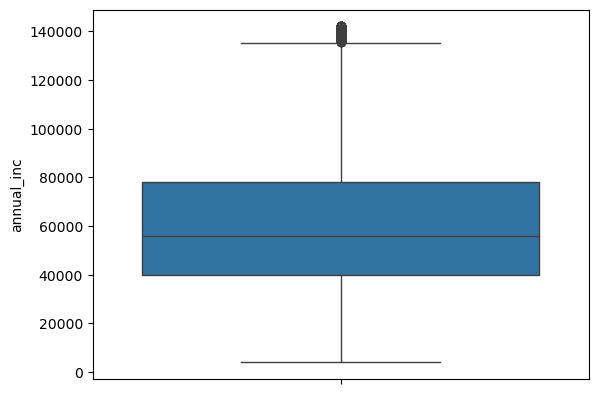

In [482]:
sns.boxplot(indf.annual_inc)

In [494]:
annual_inc_q = indf['annual_inc'].quantile([.75, 0.80, 0.85, 0.90, 0.95, .99])
annual_inc_q

0.75     70000.0
0.80     75000.0
0.85     80000.0
0.90     85000.0
0.95     93496.0
0.99    100000.0
Name: annual_inc, dtype: float64

<Axes: ylabel='annual_inc'>

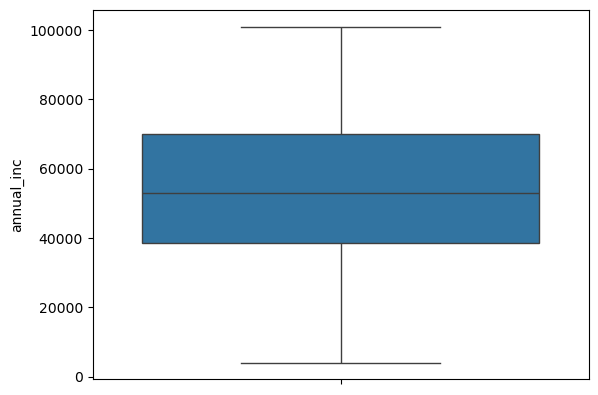

In [492]:
annual_inc_q95 = indf['annual_inc'].quantile(0.95)
indf = indf[indf.annual_inc <= annual_inc_q95]
sns.boxplot(indf["annual_inc"])

<Axes: ylabel='dti'>

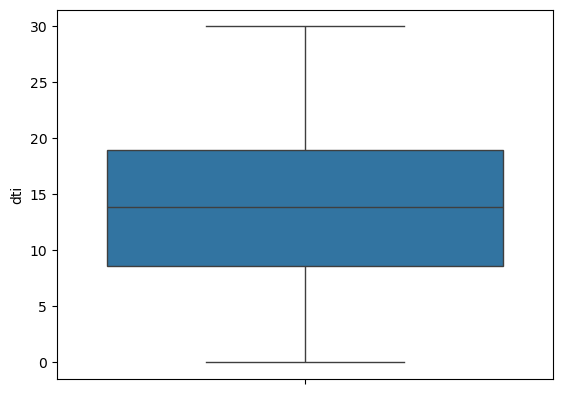

In [496]:
sns.boxplot(indf.dti)

There are no much Outliers. No need remove any data

Analysing Categorical data:

In [502]:
indf.value_counts(indf["grade"])

grade
B    10428
A     8790
C     7041
D     4568
E     2281
F      793
G      210
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

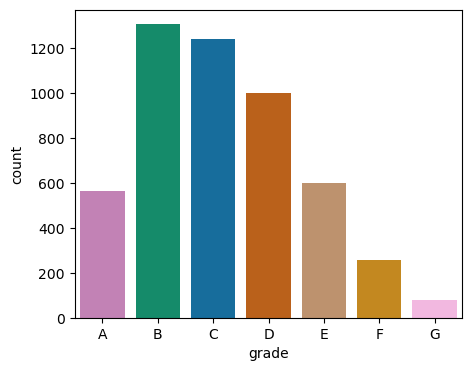

In [520]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'grade',data = indf[indf.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

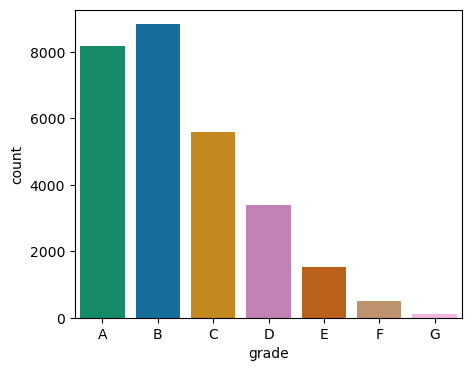

In [541]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'grade',data = indf[indf.loan_status == 'Fully Paid'])

<Axes: xlabel='grade', ylabel='count'>

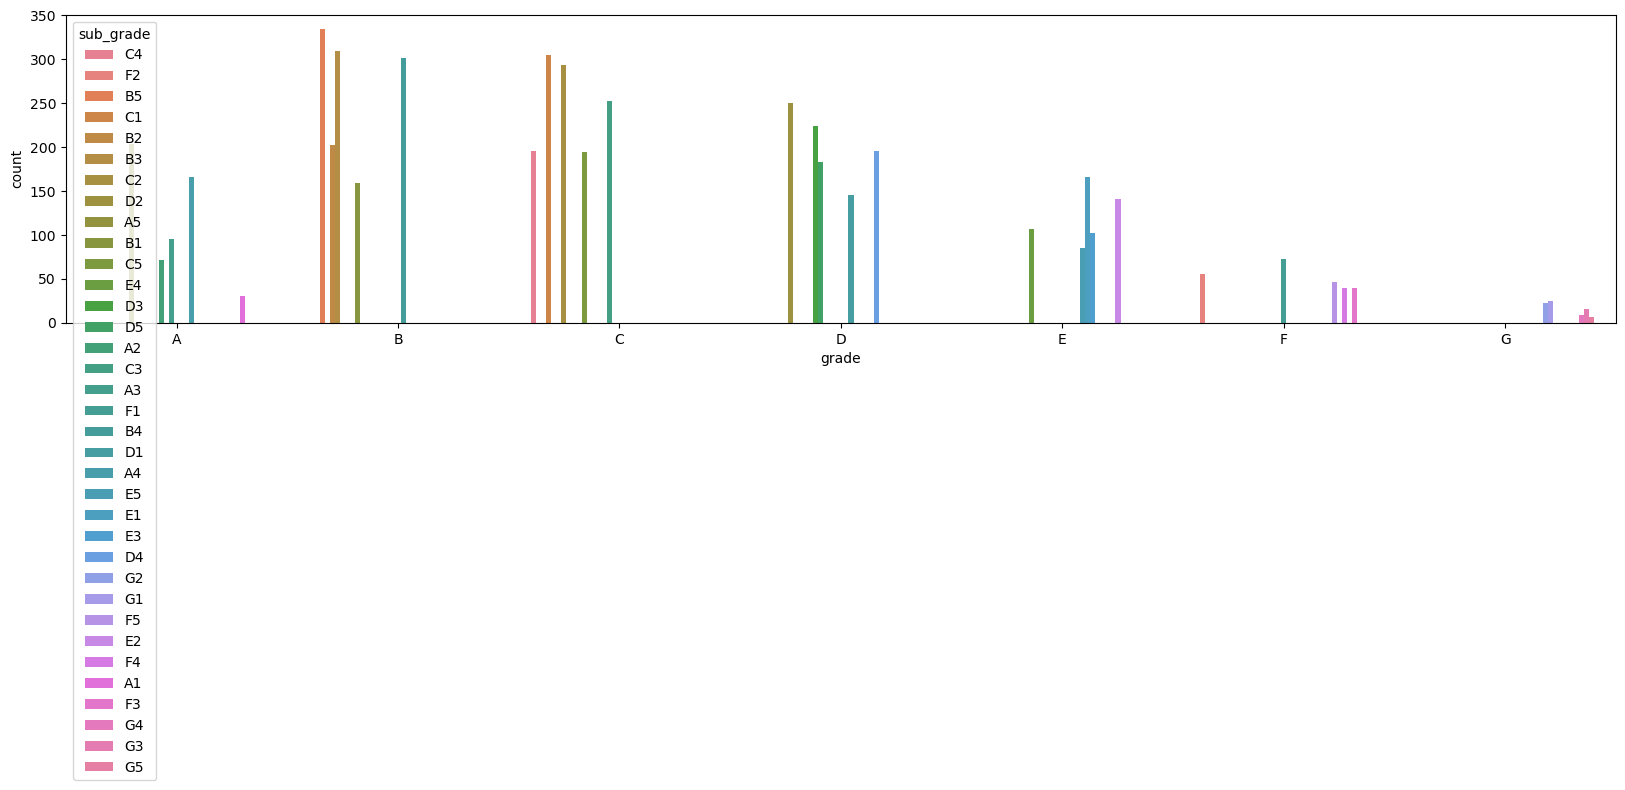

In [693]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = indf[indf.loan_status == 'Charged Off'])

<Axes: xlabel='term', ylabel='count'>

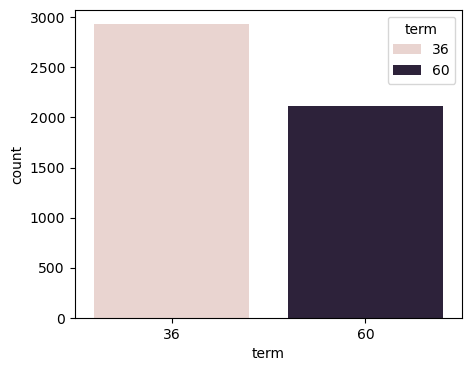

In [544]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'term', hue = 'term',data = indf[indf.loan_status == 'Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

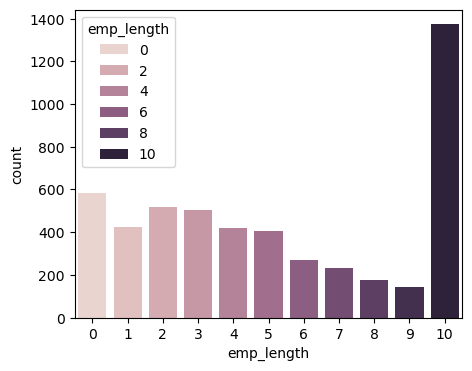

In [550]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'emp_length', hue = 'emp_length',data = indf[indf.loan_status == 'Charged Off'])

<Axes: xlabel='home_ownership', ylabel='count'>

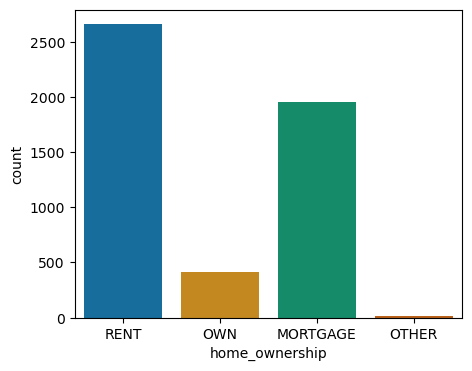

In [564]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'home_ownership', hue = 'home_ownership',data = indf[indf.loan_status == 'Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

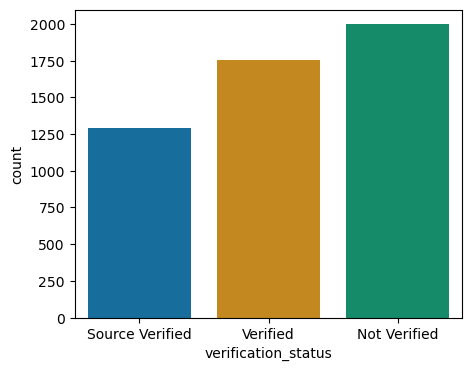

In [574]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'verification_status', hue = 'verification_status',data = indf[indf.loan_status == 'Charged Off'])

In [662]:
#creating bins for int_rate,open_acc,revol_util,total_acc
indf['int_rate_groups'] = pd.cut(indf['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
indf['installment_groups'] = pd.cut(indf['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
indf['funded_amnt_inv_group'] = pd.cut(indf['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
indf['loan_amnt_groups'] = pd.cut(indf['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
indf['dti_groups'] = pd.cut(indf['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

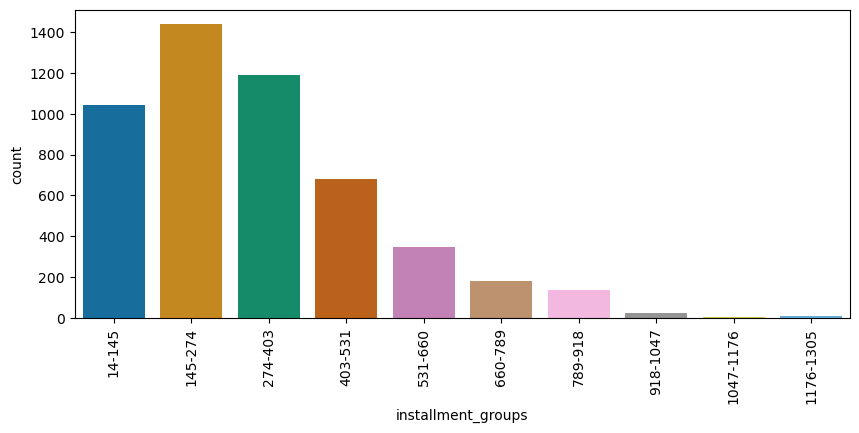

In [617]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'installment_groups', hue = 'installment_groups',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

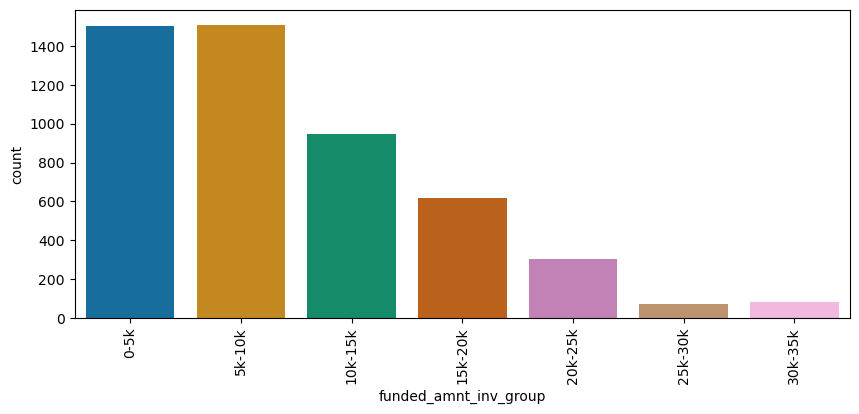

In [619]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'funded_amnt_inv_group', hue = 'funded_amnt_inv_group',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

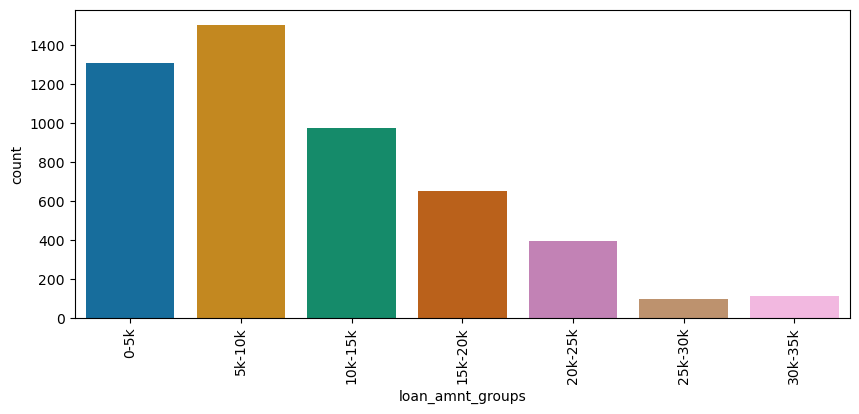

In [621]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'loan_amnt_groups', hue = 'loan_amnt_groups',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

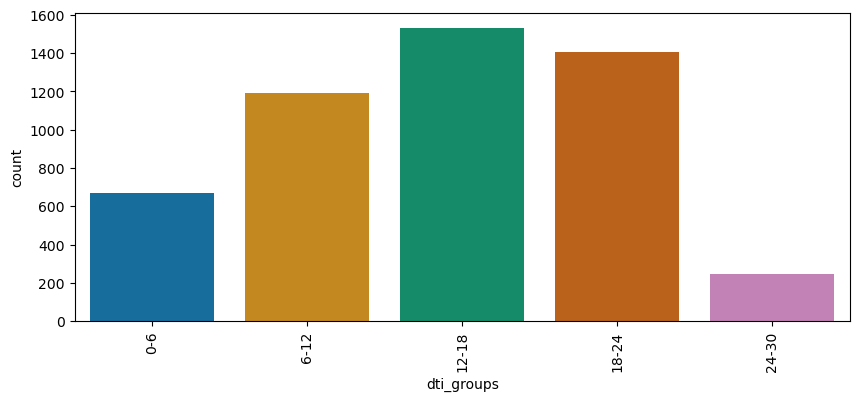

In [623]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'dti_groups', hue = 'dti_groups',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

In [586]:
## Extract month and year
indf_month_year = indf['issue_d'].str.partition("-", True)     
indf['issue_month']=indf_month_year[0]                       
indf['issue_year']='20' + indf_month_year[2]
indf.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,issue_month,issue_year
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,27.65,0,3,0,13648,83.7,9,INDIVIDUAL,Dec,2011
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,...,1.00,0,3,0,1687,9.4,4,INDIVIDUAL,Dec,2011
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,8.72,0,2,0,2956,98.5,10,INDIVIDUAL,Dec,2011
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,20.00,0,10,0,5598,21.0,37,INDIVIDUAL,Dec,2011
4,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,17.94,0,15,0,27783,53.9,38,INDIVIDUAL,Dec,2011


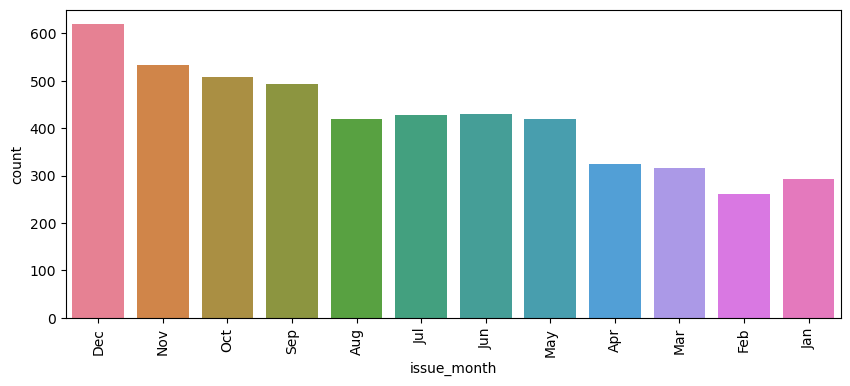

In [588]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'issue_month', hue = 'issue_month',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

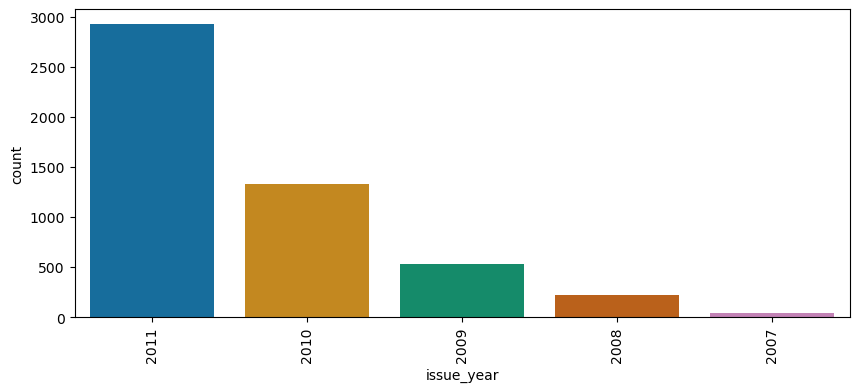

In [590]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'issue_year', hue = 'issue_year',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

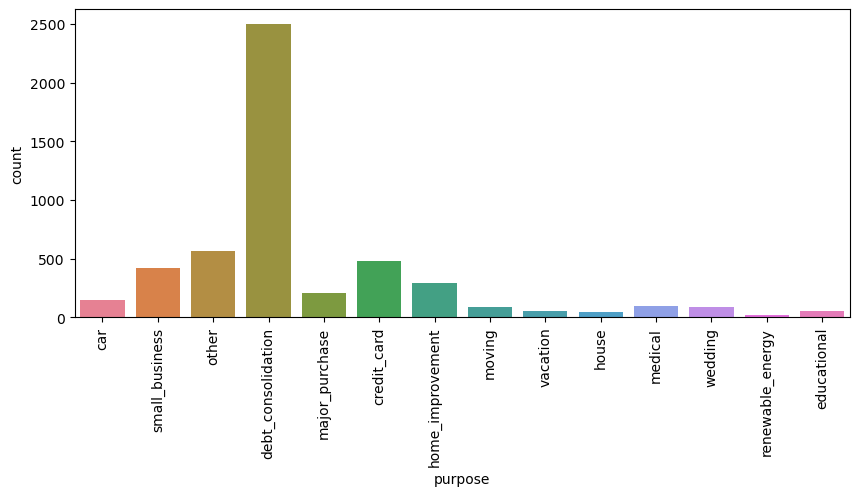

In [592]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'purpose', hue = 'purpose',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

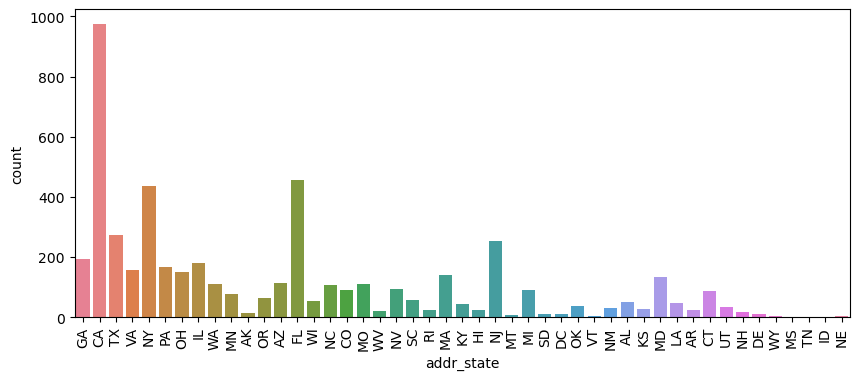

In [594]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'addr_state', hue = 'addr_state',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

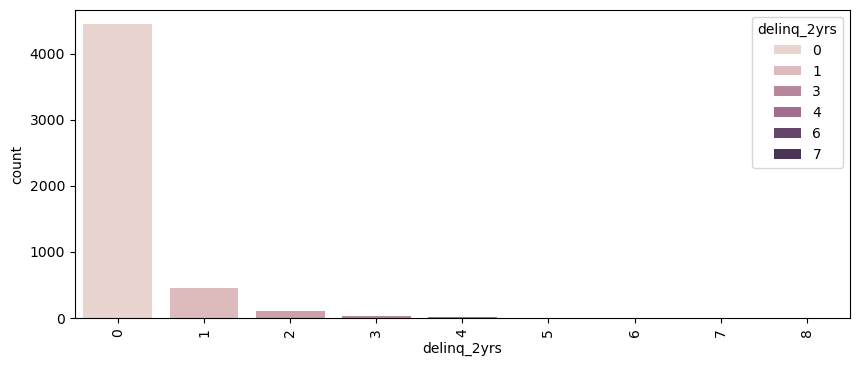

In [599]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'delinq_2yrs', hue = 'delinq_2yrs',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

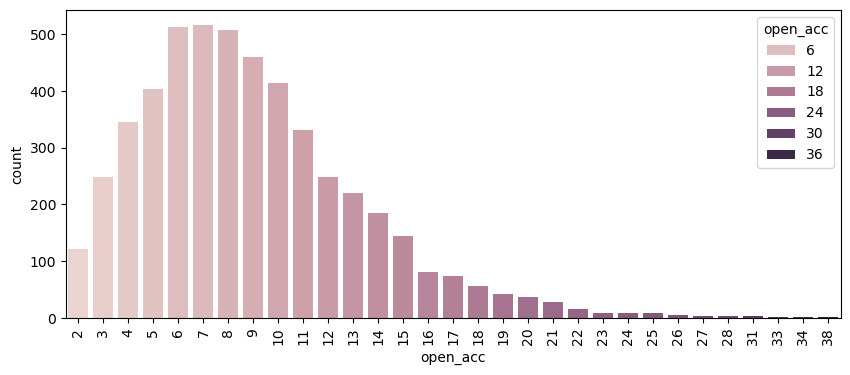

In [601]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'open_acc', hue = 'open_acc',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

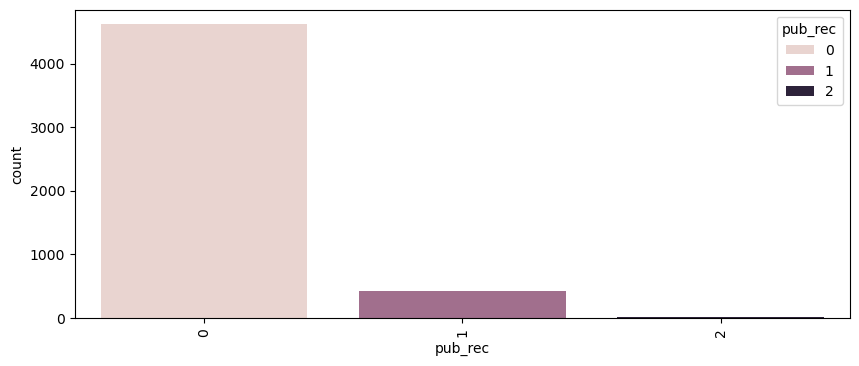

In [603]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'pub_rec', hue = 'pub_rec',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

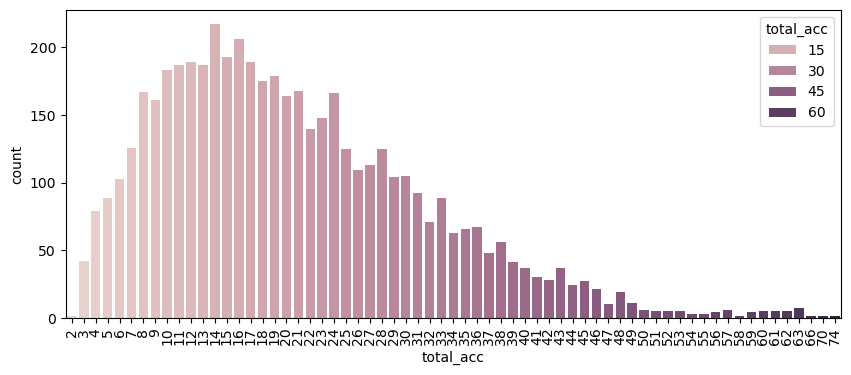

In [698]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'total_acc', hue = 'total_acc',data = indf[indf.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

Observations post Univariate analysis:
Chances of loan defaulting is more:
1. For loans with Grade B.
2. For loans with lesser tenure i.e 36 months.
3. When the employement tenure is more
4. applicants with RENT house than with Own house
5. For the loans disbursed without verification
6. With installment range of 145-274
7. When the funded amount is low
8. For lower loan_amounts than higher loan_amounts
9. For middle dti range of 12-18
10. Most of the loan defaults happened during Year ends. 
11. In 2011, there are highest defaults compared to other years.
12. Debt consolidation loans are more prone to defaulting
13. In the state of CA, there are more defaulters

Bivariate Analysis:

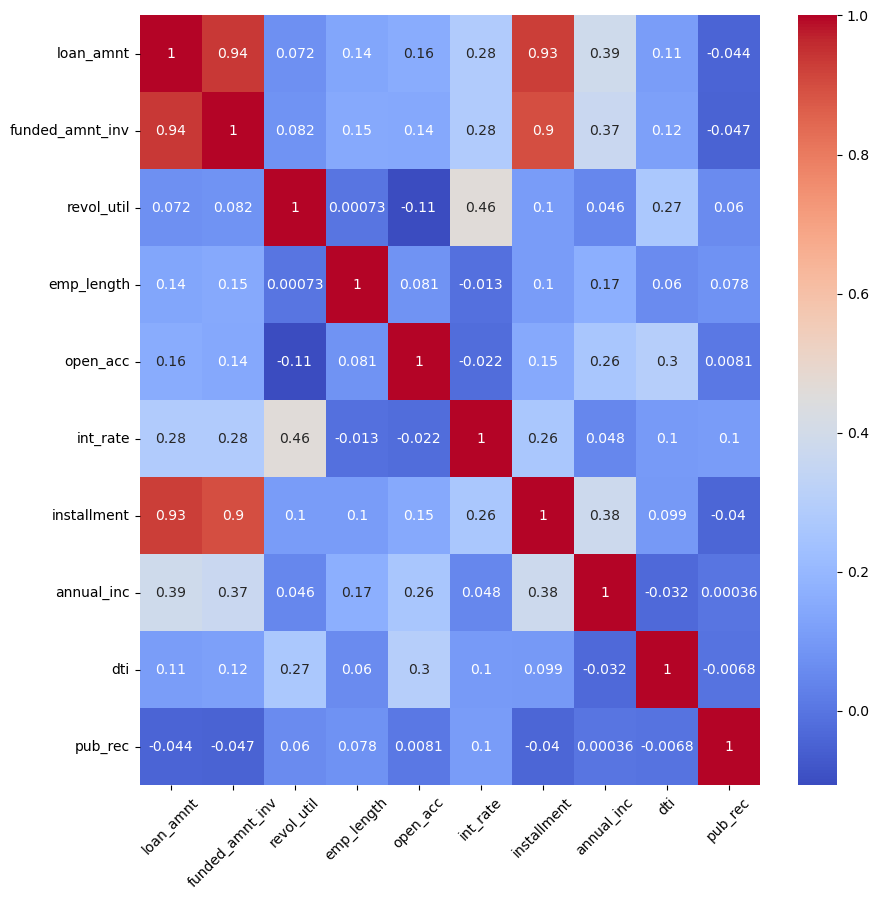

In [634]:
numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec',]
correlation_matrix = indf[numeric_columns].corr()
f,ax = plt.subplots(figsize= (10,10))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=45)
plt.show()

Analysing annual income with other columns for more insights

1.Annual income vs loan purpose

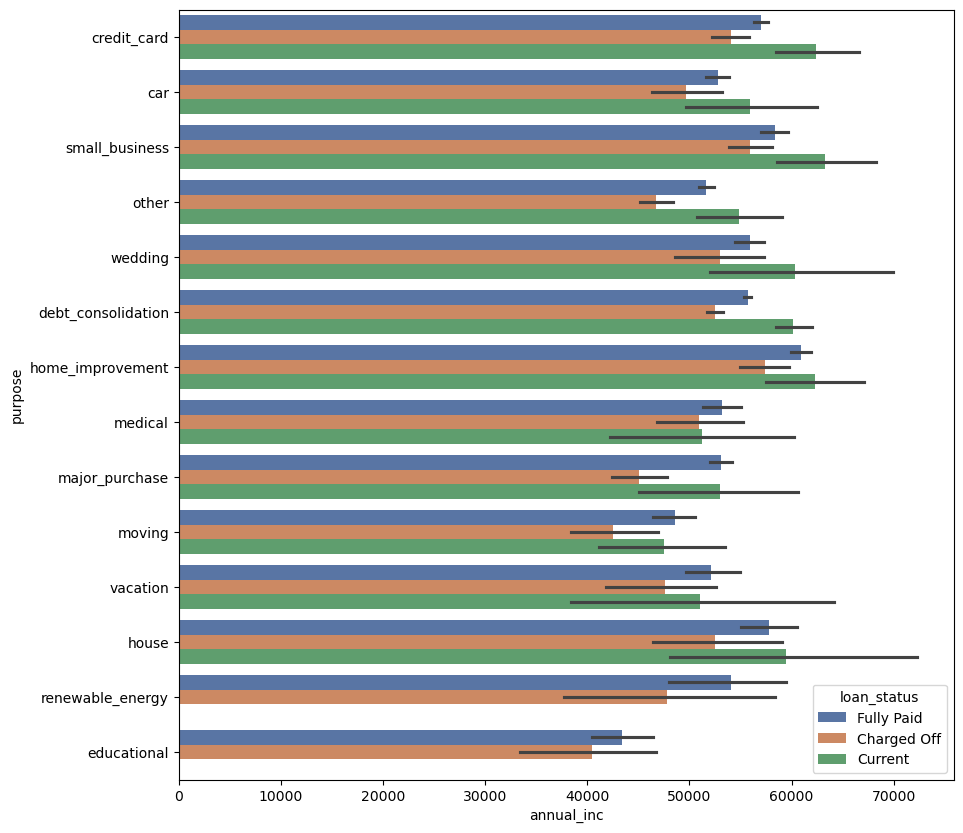

In [646]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

2.Annual income vs home ownership

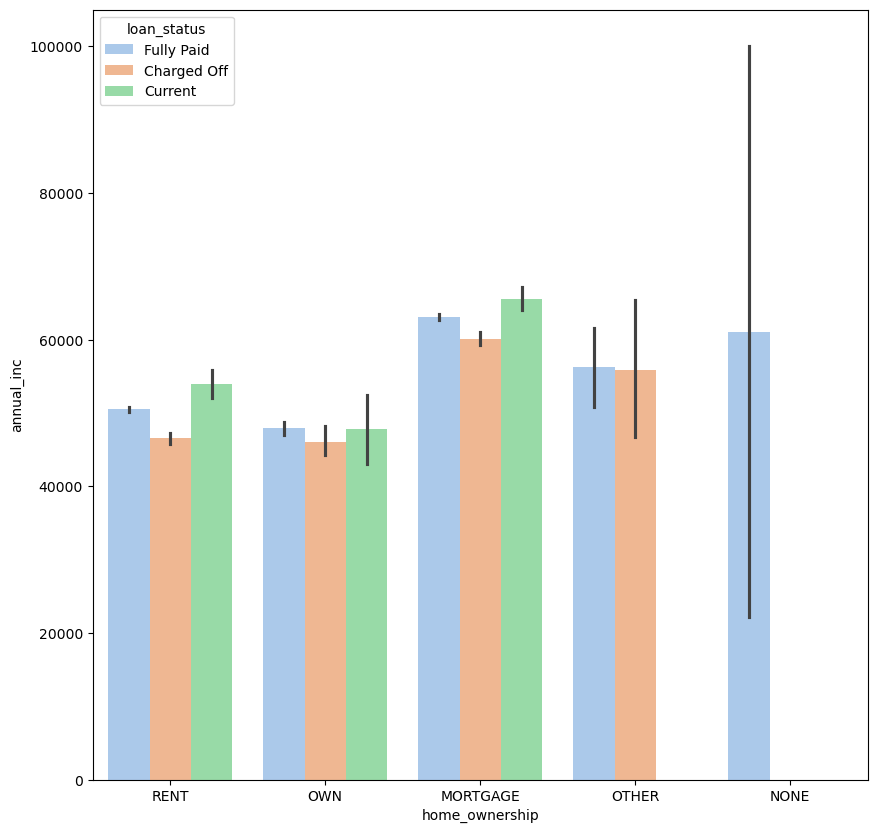

In [651]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

3. Annual income vs int_rate

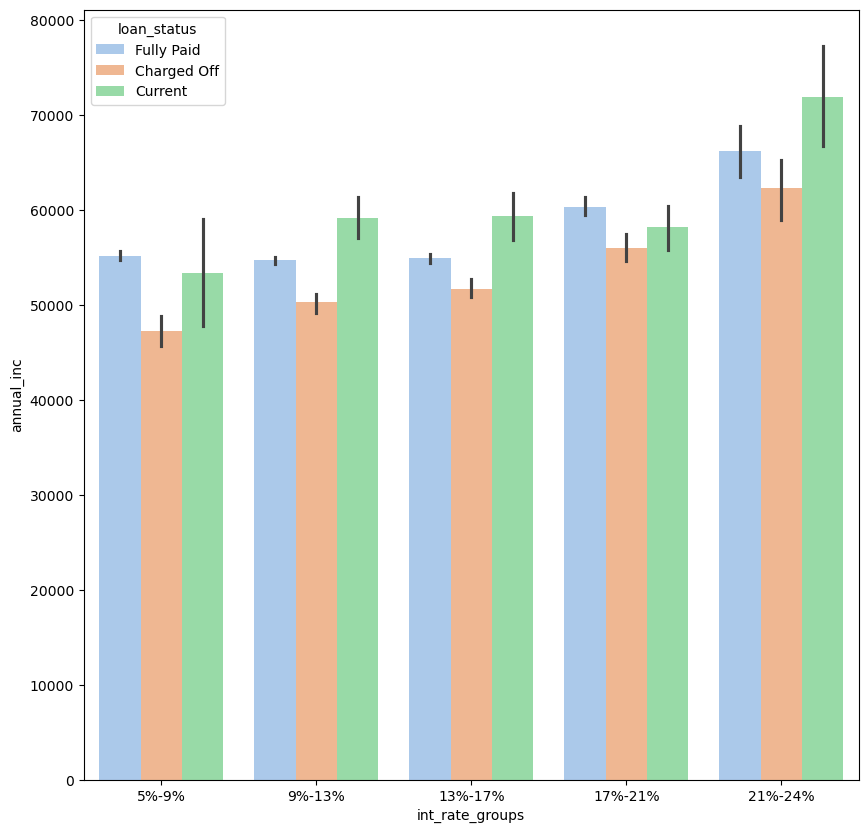

In [664]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

4. Loan Amount vs Interest Rate

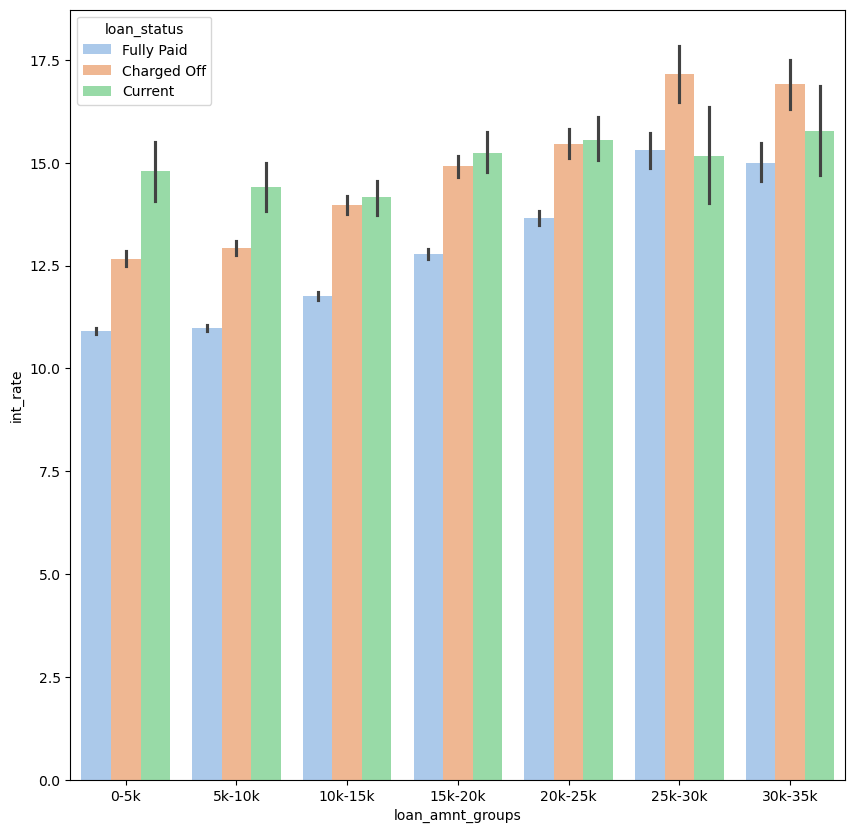

In [669]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

5.Loan vs Loan purpose

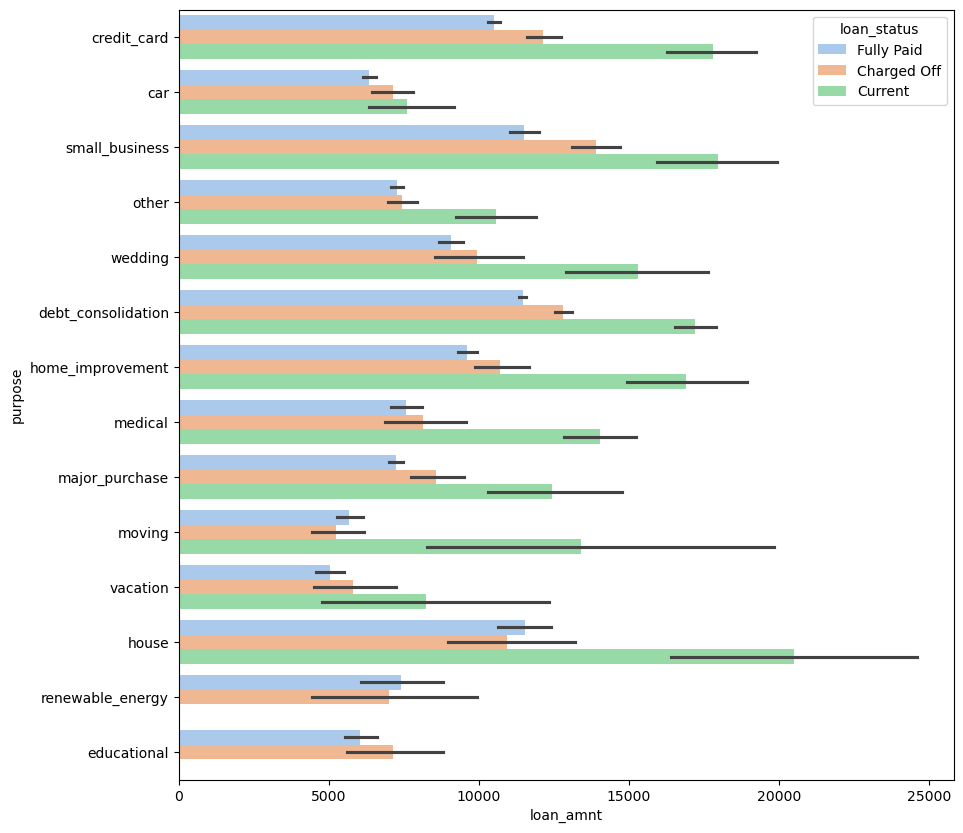

In [674]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

6.Loan vs House Ownership

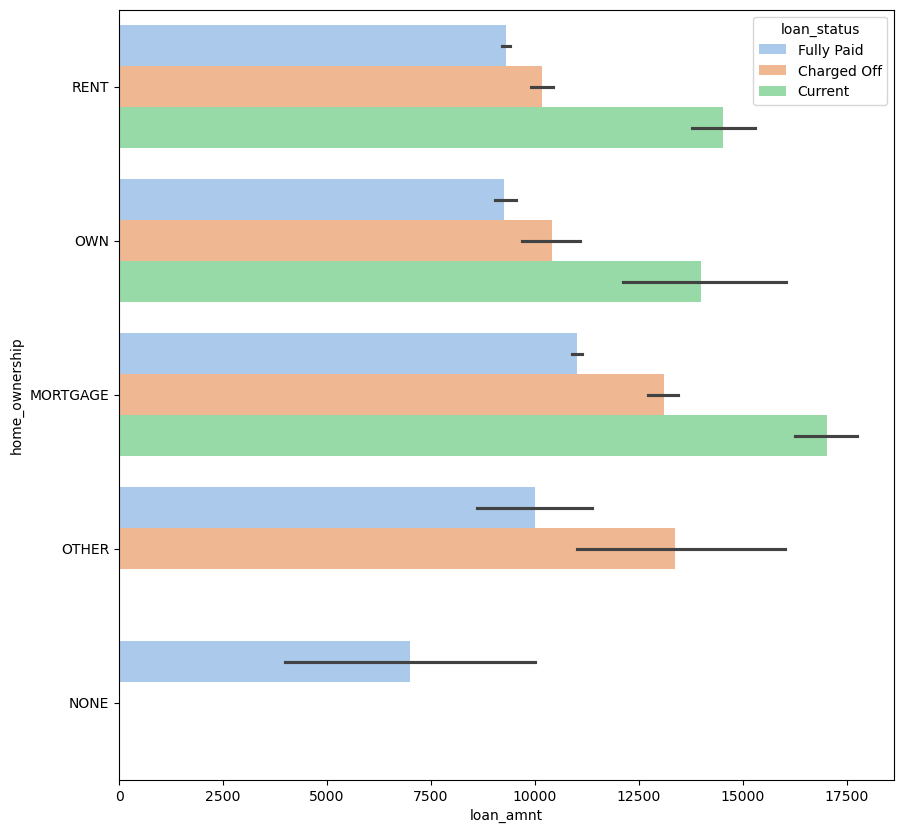

In [677]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

7.Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

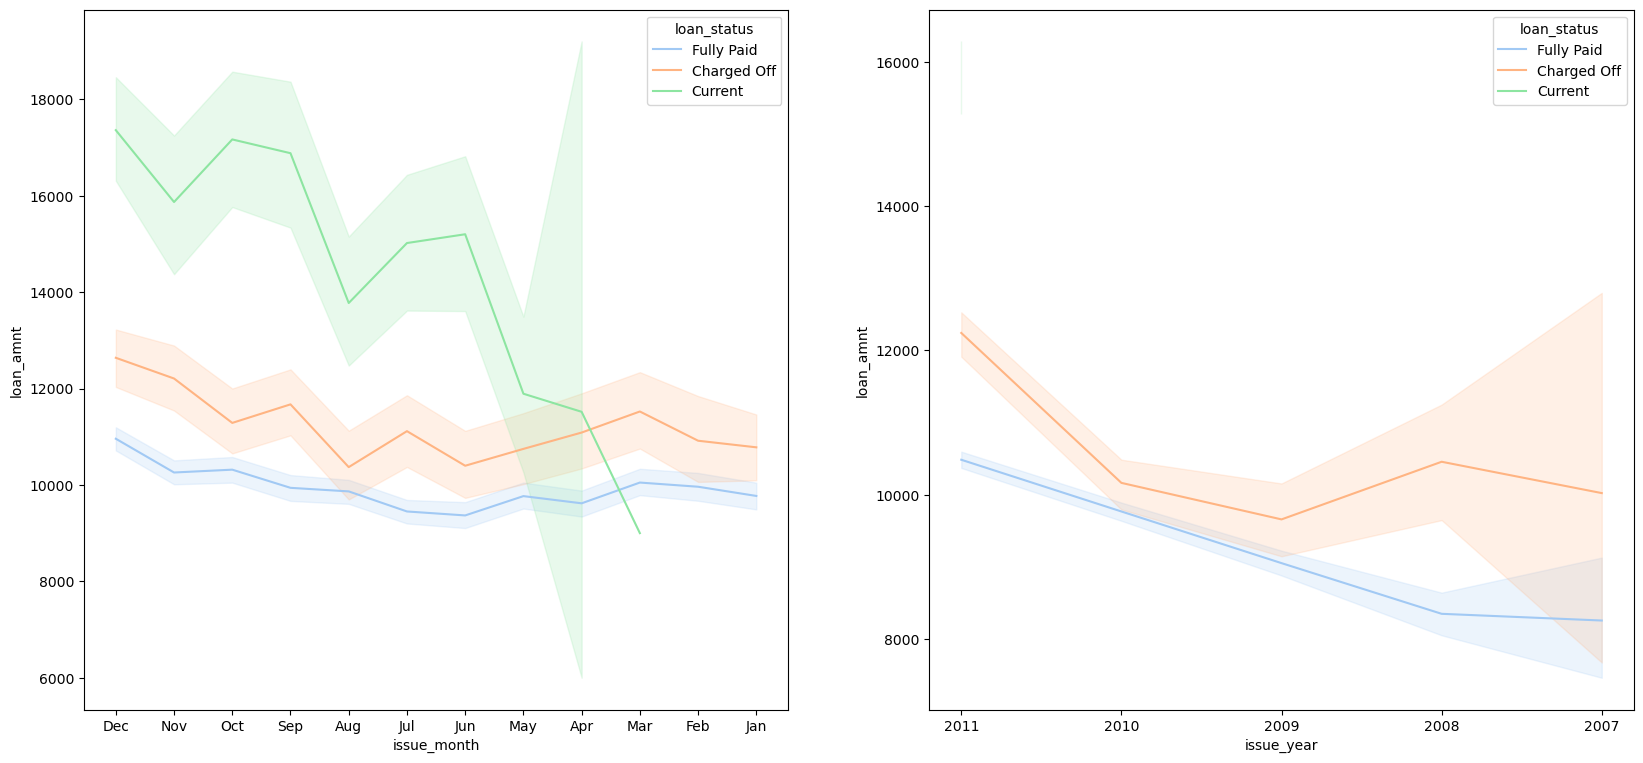

In [680]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =indf,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =indf,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

8.Loan amount vs Grade

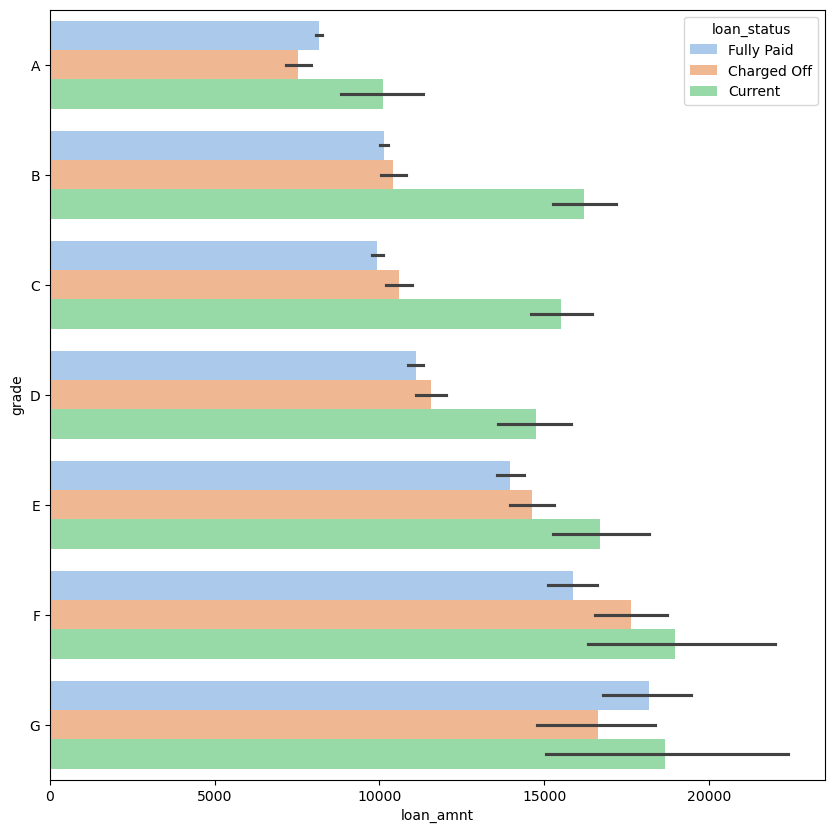

In [683]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

9. Loan amount Vs emp_length and verification_status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

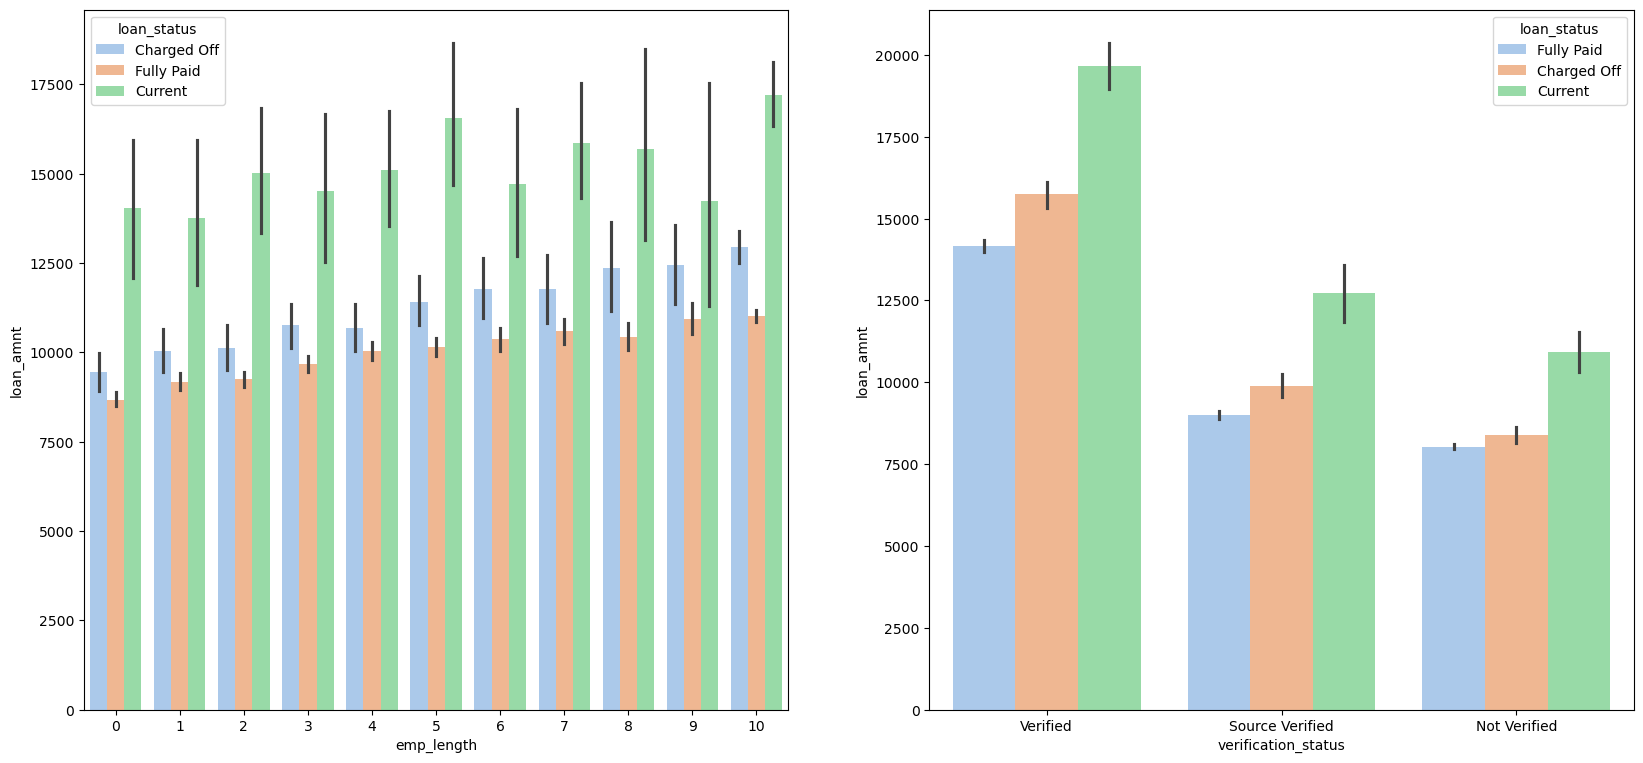

In [685]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =indf,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =indf,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

10. grade vs interest rate

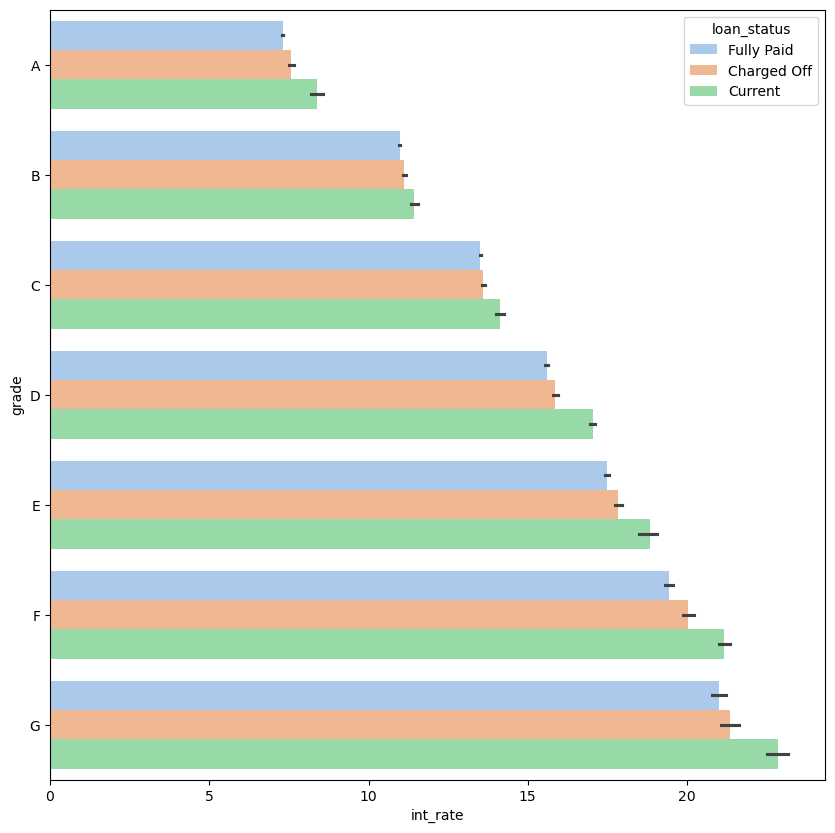

In [688]:
plt.figure(figsize=(10,10))
sns.barplot(data =indf,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

############# MULTI VARIABLES ANALYSIS ######################################

In [9]:
#Reading dataset
data = pd.read_csv("loan.csv")

#Converting string columns to int / float data type for analysis purpose
# DATA MANIPULATION - term
#print(data['term'].head(5))

#As term is in string format, converting term to int 
data['term_final'] = data['term'].apply(lambda x:int(x.split(" ")[1]))
data['term_final'].head(5)


#Converting int_rate to float 
#print(data['int_rate'].head(5))
data['int_rate_final'] = data['int_rate'].apply(lambda x:float(x[:-1]))
data['int_rate_final'].head()


#Converting emp_length to int 
#print(data['emp_length'].head())
#print(data['emp_length'].unique())
#print(data['emp_length'].isnull().sum())

#emp_length is categorical variable, checking the mode of emp_length 
#print("Mode : " ,data.emp_length.mode()[0])
#print(data.emp_length.value_counts())

#As majority of the data points have 10+years, imputing null values with 10+years
data['emp_length'].fillna(data.emp_length.mode()[0], inplace = True)
data['emp_length'].isna().sum()

#Distribution of annual income 
#plt.title("Distribution of Annual Income")
#sns.boxplot(data['annual_inc'])
#plt.show()


#Handling outliers for annual inc 
data['annual_inc'].describe()
#Removing outliers for annual inc 
def remove_outliers(df,var):
    q75 = df[var].quantile(0.75)
    q25 = df[var].quantile(0.25)
    iqr = q75 - q25
    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    print('var,lower,upper,iqr:',var,',',lower_limit,',',upper_limit,',',iqr)
    df = df[(df[var] >= lower_limit) & (df[var] <= upper_limit)]
    return df

data = remove_outliers(data,'annual_inc')

#plt.title("Distribution of Annual Income")
#sns.boxplot(data['annual_inc'])
#plt.show()

#print(data['annual_inc'].describe())
#comments IQR range of 40k to 80k with max at 1.45 lakhs

var,lower,upper,iqr: annual_inc , -22440.0 , 145144.0 , 41896.0


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



Defaulters by combination of Loan Amount range and interest rate range for term of 36 months


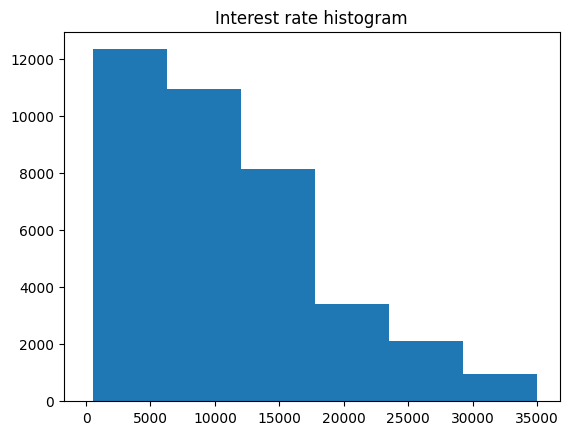

 defaulters by combination of loan range and int rate range and term of 36 months


Text(0, 0.5, '% of defaulters')

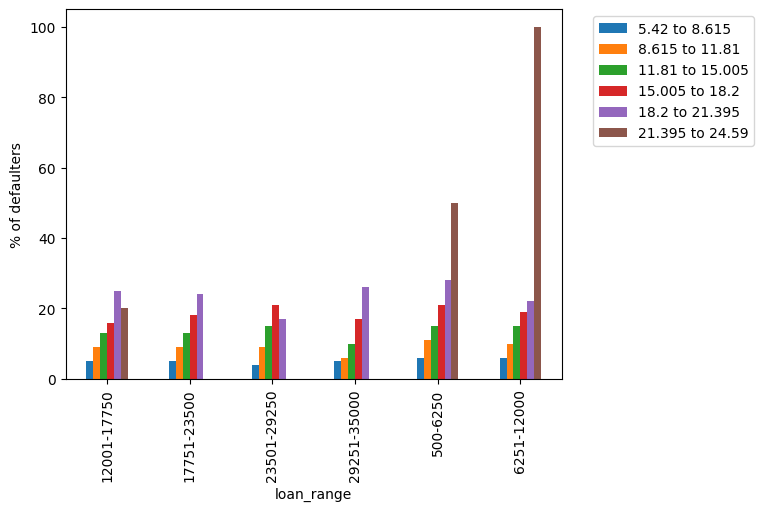

In [26]:
import numpy as np

plt.title("loan amnt histogram")
plt.hist(data['loan_amnt'],bins=6)

#Binning the loan amnt to different ranges as per above 
def get_loan_range(loan_amnt):
    if loan_amnt < 6250:
        return '500-6250'
    elif loan_amnt >= 6250 and loan_amnt < 12000 :
        return '6251-12000'
    elif loan_amnt >= 12000 and loan_amnt < 17750 :
        return '12001-17750'
    elif loan_amnt >= 17750 and loan_amnt < 23500 :
        return '17751-23500'
    elif loan_amnt >= 23500 and loan_amnt < 29250 :
        return '23501-29250'
    elif loan_amnt >= 29250 and loan_amnt <= 35000 :
        return '29251-35000'
    else:
        return 'Out of range'

data['loan_range'] = data['loan_amnt'].apply(get_loan_range)
loan_range_df = data.groupby(['loan_range'])['id'].count().reset_index()
loan_range_df = loan_range_df.rename(columns={'id':'Count'})
loan_range_df['% of total'] = round((loan_range_df['Count']/len(data))*100,0)
loan_range_df.sort_values(['% of total'])

#Comments - 83% of the loan amount issues is less than 17750

#interest rate histogram 
plt.title("Interest rate histogram")
plt.hist(data['int_rate_final'],bins=6)
plt.show()
#Binning int rate based on above histogram 
def get_int_rate(int_rate):
    if int_rate >= 5.42 and int_rate < 8.615 :
        return '5.42 to 8.615'
    elif int_rate >= 8.615 and int_rate < 11.81 :
        return '8.615 to 11.81'
    elif int_rate >= 11.81 and int_rate < 15.005 :
        return '11.81 to 15.005'
    elif int_rate >= 15.005 and int_rate < 18.2 :
        return '15.005 to 18.2'
    elif int_rate >= 18.2 and int_rate < 21.395 :
        return '18.2 to 21.395'
    elif int_rate >= 21.395 and int_rate <= 24.59 :
        return '21.395 to 24.59'
    else:
        return 'Out of range'

data['int_rate_range'] = data['int_rate_final'].apply(get_int_rate)
int_range_df = data.groupby(['int_rate_range'])['id'].count().reset_index()
int_range_df = int_range_df.rename(columns={'id':'Count'})
int_range_df['% of total'] = round((int_range_df['Count']/39717)*100,0)
int_range_df.sort_values(['% of total'])

#Comments - 80% of int rate are in the range of 5.42 to 15%


# identifying defaulters by Combination of loan range, int range and term 
combined_df = data.groupby(['loan_range','int_rate_range','term_final'])['id'].count().reset_index()
combined_df = combined_df.rename(columns={'id':'Total'})
combined_df['Total'].replace(np.nan,0,inplace=True)



data_charged_off = data[data['loan_status']=='Charged Off']
charged_off_df = data_charged_off.groupby(['loan_range','int_rate_range','term_final'])['id'].count().reset_index()
charged_off_df = charged_off_df.rename(columns={'id':'ChargedOff Total'})
charged_off_df['ChargedOff Total'].replace(np.nan,0,inplace=True)

#Merging combined_df and charged_off_df to get % of defaulters by loan amount range and interest rate range
merged_df = combined_df.merge(charged_off_df,on=['loan_range','int_rate_range','term_final'],how='left')
merged_df['% of charged off'] = round((merged_df['ChargedOff Total']/merged_df['Total'])*100,0)
merged_df.sort_values(by='% of charged off',ascending=False)

merged_df.to_csv("charge_off_by_loan_range_int_range_term_final.csv")
merged_df.sort_values(by='% of charged off',ascending=False)

#for term 36 months 
term_36 = merged_df[merged_df['term_final']==36]
term_36 = term_36[['loan_range','int_rate_range','% of charged off']]
term_36 = pd.pivot_table(term_36,index='loan_range',columns='int_rate_range',values='% of charged off',aggfunc='mean').reset_index()
#ax = term_36[['5.42 to 8.615', '8.615 to 11.81']].plot.bar()

print(" defaulters by combination of loan range and int rate range and term of 36 months")
term_36.plot(x='loan_range',y=['5.42 to 8.615','8.615 to 11.81','11.81 to 15.005','15.005 to 18.2','18.2 to 21.395','21.395 to 24.59'],kind='bar')
#For loan range of 500 to 12000, % of defaulters is high for 21.39% to 24.59%
#For loan range of 12000 to 17750, % of defaulters is high for 18.2% to 21.395% than 21.39% to 24.59%
#For loan range of 23501 to 29250, % of defaulters is high for 15.005% to 18.2% than 18.2% to 21.395%
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('% of defaulters')

For term of 36 months and any loan amount range, % of defaulters increases for increasing interest rates except for following two cases  
#1.For loan range of 12000 to 17750, % of defaulters is high for 18.2% to 21.395% than 21.39% to 24.59% (applicants more likely to default for 18.2% to 21.395%)
#2.For loan range of 23501 to 29250, % of defaulters is high for 15.005% to 18.2% than 18.2% to 21.395% (applicants more likely to default for 15.005% to 18.2%)



Defaulters by combination of Loan Amount range and interest rate range for term of 60 months


defaulters by combination of loan range and interest rate range and term of 60 months


Text(0, 0.5, '% of defaulters')

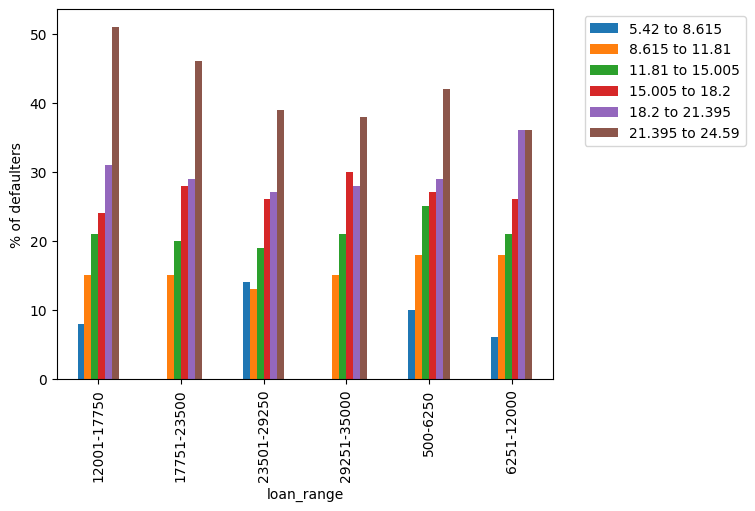

In [25]:
#for term 60 months 
term_60 = merged_df[merged_df['term_final']==60]
term_60 = term_60[['loan_range','int_rate_range','% of charged off']]
term_60 = pd.pivot_table(term_60,index='loan_range',columns='int_rate_range',values='% of charged off',aggfunc='mean').reset_index()
#ax = term_36[['5.42 to 8.615', '8.615 to 11.81']].plot.bar()

print("defaulters by combination of loan range and interest rate range and term of 60 months")
term_60.plot(x='loan_range',y=['5.42 to 8.615','8.615 to 11.81','11.81 to 15.005','15.005 to 18.2','18.2 to 21.395','21.395 to 24.59'],kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('% of defaulters')
#For term 60 months,
#for all loan ranges, 21.395 to 24.59% int rate have higher % of defaulteres 

On comparing % of defaulters from term of 60 months with 36 months, we can see that for all interest rate except interest rate of > 21.395, term 36 months defaulters were near to 20% while for 60 months, all loan ranges with interest rate of >= 15% have more than 25% of defaulters.

Term 60 months have higher % of defaulters for higher interest rates


Defaulteres by combination of purpose and income range 

% of defaulters by combination of purpose and income range


Text(0, 0.5, '% of defaulters')

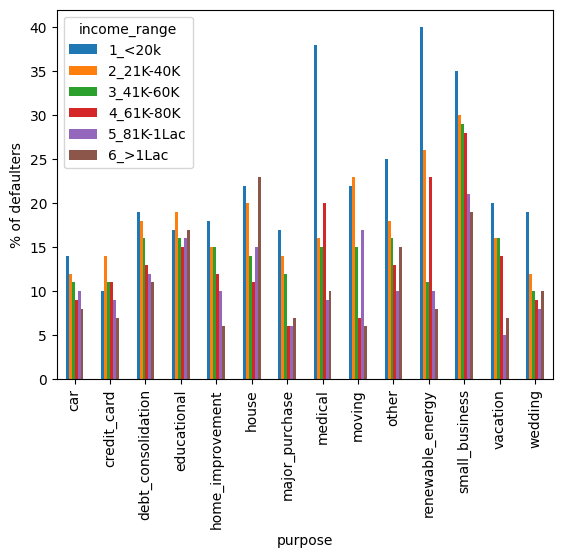

In [36]:
#Defaulters by different income ranges for each of the purpose
#Income range 
def get_income_range(income):
    if income <= 20000 :
        return '1_<20k'
    elif income > 20000 and income <= 40000 :
        return '2_21K-40K'
    elif income > 40000 and income <= 60000 :
        return '3_41K-60K'
    elif income > 60000 and income <= 80000 :
        return '4_61K-80K'
    elif income > 80000 and income <= 100000 :
        return '5_81K-1Lac'
    else:
        return '6_>1Lac'

data['income_range'] = data['annual_inc'].apply(get_income_range)
income_range = data.groupby(['income_range'])['id'].count().reset_index()
income_range = income_range.rename(columns={'id':'Count'})
income_range['% of total'] = round((income_range['Count']/len(data))*100,0)
income_range.sort_values(['% of total'])

#Income range and purpose and defaulters 
combined_df = data.groupby(['purpose','income_range'])['id'].count().reset_index()
combined_df = combined_df.rename(columns={'id':'Total'})



data_charged_off = data[data['loan_status']=='Charged Off']
charged_off_df = data_charged_off.groupby(['purpose','income_range'])['id'].count().reset_index()
charged_off_df = charged_off_df.rename(columns={'id':'ChargedOff Total'})

#Merging combined_df and charged_off
merged_df = combined_df.merge(charged_off_df,on=['purpose','income_range'],how='left')
merged_df['% of charged off'] = round((merged_df['ChargedOff Total']/merged_df['Total'])*100,0)
merged_df.sort_values(by='% of charged off',ascending=False)

merged_df.to_csv("charge_off_by_loan_range_int_range_term_final.csv")
merged_df.sort_values(by='% of charged off',ascending=False)

print("% of defaulters by combination of purpose and income range")
purpose_income = merged_df[['purpose','income_range','% of charged off']]
purpose_income = pd.pivot_table(purpose_income,index='purpose',columns='income_range',values='% of charged off',aggfunc='mean').reset_index()
#ax = term_36[['5.42 to 8.615', '8.615 to 11.81']].plot.bar()


purpose_income.plot(x='purpose',y=['1_<20k','2_21K-40K','3_41K-60K','4_61K-80K','5_81K-1Lac','6_>1Lac'],kind='bar')
plt.ylabel("% of defaulters")
#Insights - For purpose of house alone, members with income of >1 lac have defaulted(23%) more than <20K range(22%). for others mostly members have defaulted more from <20k income
#Especially for purpose of renewable energy(40%), medical(38%) and small business (35%) defaulters from <20K range 

 When the purpose of loan is for house, applicants with income of >1 lac have defaulted(23%) more than <20K range(22%). For other purposes, <20K income range applicants have higher % of defaulters. Especially for purpose of renewable energy(40%), medical(38%) and small business (35%) defaulters from <20K range 


Defaulters by combination of employement tenure and home ownership

% of defaulters by combination of employment tenure and home ownership


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0, 0.5, '% of defaulters')

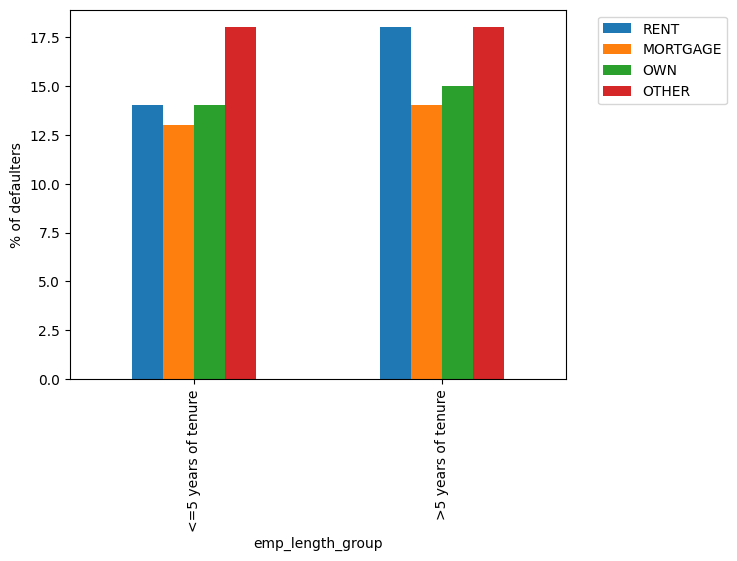

In [37]:
#Emp_length and home_ownership - defaulters
data['emp_length_group']=">5 years of tenure"
data['emp_length_group'][(data['emp_length']=='< 1 year') | (data['emp_length']=='1 year')
                        | (data['emp_length']=='2 years')
                        | (data['emp_length']=='3 years')
                        | (data['emp_length']=='4 years')
                        | (data['emp_length']=='5 years')]='<=5 years of tenure'
combined_df = data.groupby(['emp_length_group','home_ownership'])['id'].count().reset_index()
combined_df = combined_df.rename(columns={'id':'Total'})



data_charged_off = data[data['loan_status']=='Charged Off']
charged_off_df = data_charged_off.groupby(['emp_length_group','home_ownership'])['id'].count().reset_index()
charged_off_df = charged_off_df.rename(columns={'id':'ChargedOff Total'})

#Merging combined_df and charged_off
merged_df = combined_df.merge(charged_off_df,on=['emp_length_group','home_ownership'],how='left')
merged_df['% of charged off'] = round((merged_df['ChargedOff Total']/merged_df['Total'])*100,0)
merged_df.sort_values(by='% of charged off',ascending=False)

merged_df.to_csv("charge_off_by_loan_range_int_range_term_final.csv")
merged_df.sort_values(by='% of charged off',ascending=False)


purpose_income = merged_df[['emp_length_group','home_ownership','% of charged off']]
purpose_income = pd.pivot_table(purpose_income,index='emp_length_group',columns='home_ownership',values='% of charged off',aggfunc='mean').reset_index()
#ax = term_36[['5.42 to 8.615', '8.615 to 11.81']].plot.bar()

print("% of defaulters by combination of employment tenure and home ownership")
purpose_income.plot(x='emp_length_group',y=['RENT','MORTGAGE','OWN','OTHER'],kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('% of defaulters')
#Insights - Members with employment tenure of more than 5 years and statying in a rent have higher % of defaulters compared to 
#employee with tenure of less than or equal to 5 years. For other home ownerships of own, mortgage and others , both the tenures 
#have similar % of defaulters

Applicants with employment tenure of more than 5 years and staying in a rented house have higher % of defaulters compared to employee with tenure of less than or equal to 5 years. For other home ownerships of own, mortgage and others , both the tenures have similar % of defaulters


Defaulters by combination of loan range and verification status 

% of defaulters by combination of loan range and verification status


Text(0, 0.5, '% of defaulters')

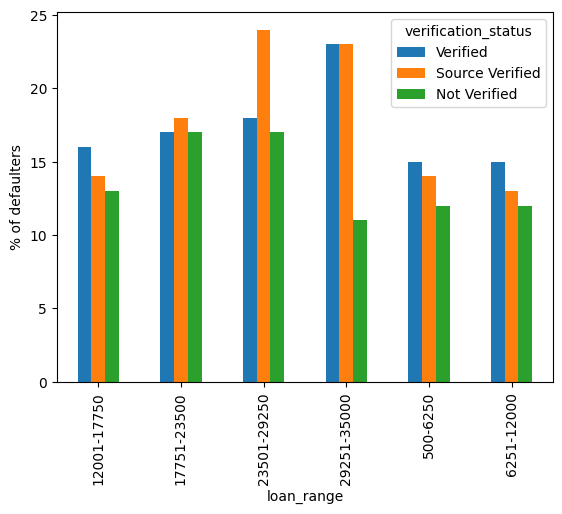

In [39]:
#verification status and loan_range - defaulters

combined_df = data.groupby(['loan_range','verification_status'])['id'].count().reset_index()
combined_df = combined_df.rename(columns={'id':'Total'})



data_charged_off = data[data['loan_status']=='Charged Off']
charged_off_df = data_charged_off.groupby(['loan_range','verification_status'])['id'].count().reset_index()
charged_off_df = charged_off_df.rename(columns={'id':'ChargedOff Total'})

#Merging combined_df and charged_off
merged_df = combined_df.merge(charged_off_df,on=['loan_range','verification_status'],how='left')
merged_df['% of charged off'] = round((merged_df['ChargedOff Total']/merged_df['Total'])*100,0)
merged_df.sort_values(by='% of charged off',ascending=False)




loan_range_verification = merged_df[['loan_range','verification_status','% of charged off']]
loan_range_verification = pd.pivot_table(loan_range_verification,index='loan_range',columns='verification_status',values='% of charged off',aggfunc='mean').reset_index()
#ax = term_36[['5.42 to 8.615', '8.615 to 11.81']].plot.bar()

print("% of defaulters by combination of loan range and verification status")
loan_range_verification.plot(x='loan_range',y=['Verified','Source Verified','Not Verified'],kind='bar')
plt.ylabel('% of defaulters')
#Insights -loan amount in the range > 17750 have higher % of defaulters from source verified compared to other statuses 
#Loan amount in the range <17750 have higher % of defaulters from verified status 


Applicants who took loan amount in the range > 17750 have higher % of defaulters from source verified compared to other statuses 
Applicants who took loan amount in the range < 17750 have higher % of defaulters from verified status compared to other statuses 
